In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import json
import time
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_imdb_name = pd.read_csv('zippedData/imdb.name.basics.csv')
df_imdb_title = pd.read_csv('zippedData/imdb.title.akas.csv')
df_imdb_basic = pd.read_csv('zippedData/imdb.title.basics.csv')
df_imdb_crew = pd.read_csv('zippedData/imdb.title.crew.csv')
df_imdb_prin = pd.read_csv('zippedData/imdb.title.principals.csv')
df_imdb_rating = pd.read_csv('zippedData/imdb.title.ratings.csv')

In [6]:
df_imdb_name.shape,df_imdb_title.shape,df_imdb_basic.shape,df_imdb_crew.shape,df_imdb_prin.shape,df_imdb_rating.shape

((606648, 6), (331703, 8), (146144, 6), (146144, 3), (1028186, 6), (73856, 3))

In [7]:
df_imdb_name.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [8]:
df_imdb_title.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [9]:
df_imdb_basic.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [10]:
df_imdb_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [11]:
df_imdb_prin.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [12]:
df_imdb_rating.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [25]:
df_imdb_title.title_id.value_counts()[:100]

tt2488496    61
tt1201607    55
tt2310332    55
tt2948356    53
tt2278871    53
             ..
tt4500922    41
tt1911658    41
tt3521164    41
tt2279373    41
tt1951266    41
Name: title_id, Length: 100, dtype: int64

In [30]:
#df_imdb_title[df_imdb_title['title_id'] == 'tt0369610']

Text(0.5, 1.0, 'top 10 countries')

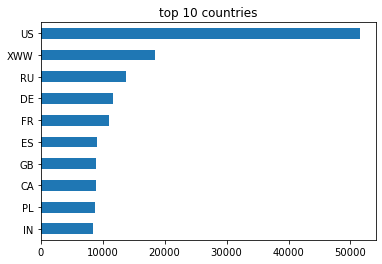

In [41]:
df_imdb_title.region.value_counts()[:10][::-1].plot(kind='barh')
plt.title('top 10 countries')

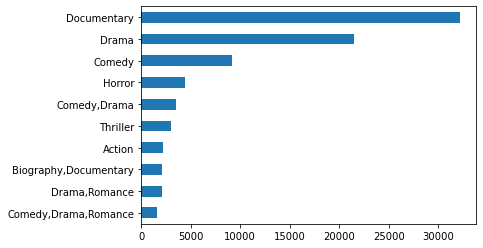

In [45]:
df_imdb_basic.genres.value_counts()[:10][::-1].plot(kind='barh')

In [46]:
df_imdb_rating.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [ ]:
df_imdb_rating['title'] = 

In [70]:
df_imdb_basic[df_imdb_basic['tconst'] == 'tt1375666']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
7066,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"


In [65]:
df_imdb_rating.sort_values(by=['numvotes'],ascending=False)

,tconst,averagerating,numvotes
63498,tt1375666,8.8,1841066
8738,tt1345836,8.4,1387769
24920,tt0816692,8.6,1299334
38058,tt1853728,8.4,1211405
48221,tt0848228,8.1,1183655
...,...,...,...
39180,tt8050582,8.0,5
33886,tt6449270,4.0,5
22243,tt3819584,7.6,5
49605,tt2136926,5.8,5


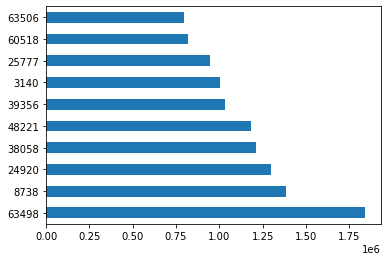

In [64]:
df_imdb_rating.sort_values(by=['numvotes'],ascending=False)['numvotes'][:10].plot(kind='barh')